In [1]:
# Import the dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from citipy import citipy
import requests
from datetime import datetime
from config import weather_api_key

In [2]:
# Create a set of random latitude and longitude combinations
lats = np.random.uniform(-90, 90, size=1500)
lngs = np.random.uniform(-180, 180, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list
coordinates = list(lat_lngs)

In [4]:
# Create a list for holding the cities
cities = []

# Identify the nearest city for each latitude and longitude combination
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, the we will add it to the cities list
    if city not in cities:
        cities.append(city)
        
# Print the city count to confirm sufficient count
len(cities)

639

In [5]:
# URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=62b732c85c4beda33a39d57a62ef408b


In [6]:
# Create an empty list to hold the weather data
city_data = []

# Print the beginning of the logging
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list
for i, city in enumerate(cities):
    
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        
    # Create endpoint URL with each city
    city_url = url + "&q=" + city.replace(" ", "+")
    
    # Log the URL, record, and set numbers and the city
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    # Add 1 to the record count
    record_count += 1
    
# Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        
        # Parse out the needed data
        city_title = city_weather["name"]
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        
        # Convert the date to ISO standard
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        
        # Append the city information into city_data list
        city_data.append({"City": city_title,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
        
# If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
        
# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | carnarvon
Processing Record 2 of Set 1 | cape town
Processing Record 3 of Set 1 | albany
Processing Record 4 of Set 1 | souillac
Processing Record 5 of Set 1 | kango
Processing Record 6 of Set 1 | comodoro rivadavia
Processing Record 7 of Set 1 | ordu
Processing Record 8 of Set 1 | ostrovnoy
Processing Record 9 of Set 1 | rikitea
Processing Record 10 of Set 1 | victoria
Processing Record 11 of Set 1 | mayo
Processing Record 12 of Set 1 | port elizabeth
Processing Record 13 of Set 1 | lolua
City not found. Skipping...
Processing Record 14 of Set 1 | airai
Processing Record 15 of Set 1 | sinop
Processing Record 16 of Set 1 | coquimbo
Processing Record 17 of Set 1 | carmaux
Processing Record 18 of Set 1 | faya
Processing Record 19 of Set 1 | christchurch
Processing Record 20 of Set 1 | tasiilaq
Processing Record 21 of Set 1 | grand centre
City not found. Skipping...
Processing Record 22 of Set 1 | s

Processing Record 38 of Set 4 | carupano
Processing Record 39 of Set 4 | antofagasta
Processing Record 40 of Set 4 | vao
Processing Record 41 of Set 4 | sao joao da barra
Processing Record 42 of Set 4 | markova
Processing Record 43 of Set 4 | flinders
Processing Record 44 of Set 4 | pousat
City not found. Skipping...
Processing Record 45 of Set 4 | okha
Processing Record 46 of Set 4 | asau
Processing Record 47 of Set 4 | saskylakh
Processing Record 48 of Set 4 | nome
Processing Record 49 of Set 4 | auki
Processing Record 50 of Set 4 | acapulco
Processing Record 1 of Set 5 | torbat-e jam
Processing Record 2 of Set 5 | barentsburg
City not found. Skipping...
Processing Record 3 of Set 5 | pachino
Processing Record 4 of Set 5 | santa luzia
Processing Record 5 of Set 5 | najran
Processing Record 6 of Set 5 | front royal
Processing Record 7 of Set 5 | bambous virieux
Processing Record 8 of Set 5 | high level
Processing Record 9 of Set 5 | daru
Processing Record 10 of Set 5 | kruisfontein
Pr

Processing Record 24 of Set 8 | dingle
Processing Record 25 of Set 8 | pouembout
Processing Record 26 of Set 8 | clovis
Processing Record 27 of Set 8 | adiake
Processing Record 28 of Set 8 | moville
Processing Record 29 of Set 8 | tyrma
Processing Record 30 of Set 8 | te anau
Processing Record 31 of Set 8 | namatanai
Processing Record 32 of Set 8 | portobelo
Processing Record 33 of Set 8 | kichera
Processing Record 34 of Set 8 | manavalakurichi
Processing Record 35 of Set 8 | akdepe
Processing Record 36 of Set 8 | resistencia
Processing Record 37 of Set 8 | kerouane
Processing Record 38 of Set 8 | trabzon
Processing Record 39 of Set 8 | behbahan
Processing Record 40 of Set 8 | sartell
Processing Record 41 of Set 8 | geraldton
Processing Record 42 of Set 8 | puertollano
Processing Record 43 of Set 8 | chiang rai
Processing Record 44 of Set 8 | ciudad bolivar
Processing Record 45 of Set 8 | koulamoutou
Processing Record 46 of Set 8 | celestun
Processing Record 47 of Set 8 | chilliwack
Pr

Processing Record 15 of Set 12 | hualmay
Processing Record 16 of Set 12 | tiznit
Processing Record 17 of Set 12 | alyangula
Processing Record 18 of Set 12 | sumbawanga
Processing Record 19 of Set 12 | beloha
Processing Record 20 of Set 12 | nizamabad
Processing Record 21 of Set 12 | chicama
Processing Record 22 of Set 12 | koulikoro
Processing Record 23 of Set 12 | klyuchi
Processing Record 24 of Set 12 | springfield
Processing Record 25 of Set 12 | kodinsk
Processing Record 26 of Set 12 | galiwinku
City not found. Skipping...
Processing Record 27 of Set 12 | rocha
Processing Record 28 of Set 12 | campestre
Processing Record 29 of Set 12 | yumen
Processing Record 30 of Set 12 | kenai
Processing Record 31 of Set 12 | kieta
Processing Record 32 of Set 12 | sola
Processing Record 33 of Set 12 | bosansko grahovo
Processing Record 34 of Set 12 | lamu
Processing Record 35 of Set 12 | lander
Processing Record 36 of Set 12 | wetaskiwin
Processing Record 37 of Set 12 | treinta y tres
Processing

In [7]:
len(city_data)

585

In [8]:
# Convert the array of dictionaries to a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Carnarvon,-24.8667,113.6333,64.47,72,40,13.80,AU,2021-10-02 15:34:31
1,Cape Town,-33.9258,18.4232,61.11,49,75,3.00,ZA,2021-10-02 15:30:55
2,Albany,42.6001,-73.9662,69.26,74,91,1.01,US,2021-10-02 15:33:48
3,Souillac,-20.5167,57.5167,74.35,78,75,17.27,MU,2021-10-02 15:34:32
4,Kango,0.1943,10.0951,79.00,88,82,5.35,GA,2021-10-02 15:34:32
5,Comodoro Rivadavia,-45.8667,-67.5000,49.86,40,20,16.11,AR,2021-10-02 15:34:33
6,Ordu,40.9086,37.6845,48.70,90,98,0.81,TR,2021-10-02 15:34:33
7,Ostrovnoy,68.0531,39.5131,44.91,81,57,17.98,RU,2021-10-02 15:34:34
8,Rikitea,-23.1203,-134.9692,72.64,72,2,21.25,PF,2021-10-02 15:34:34
9,Hong Kong,22.2855,114.1577,86.38,76,11,1.99,HK,2021-10-02 15:29:51


In [9]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Carnarvon,AU,2021-10-02 15:34:31,-24.8667,113.6333,64.47,72,40,13.80
1,Cape Town,ZA,2021-10-02 15:30:55,-33.9258,18.4232,61.11,49,75,3.00
2,Albany,US,2021-10-02 15:33:48,42.6001,-73.9662,69.26,74,91,1.01
3,Souillac,MU,2021-10-02 15:34:32,-20.5167,57.5167,74.35,78,75,17.27
4,Kango,GA,2021-10-02 15:34:32,0.1943,10.0951,79.00,88,82,5.35
5,Comodoro Rivadavia,AR,2021-10-02 15:34:33,-45.8667,-67.5000,49.86,40,20,16.11
6,Ordu,TR,2021-10-02 15:34:33,40.9086,37.6845,48.70,90,98,0.81
7,Ostrovnoy,RU,2021-10-02 15:34:34,68.0531,39.5131,44.91,81,57,17.98
8,Rikitea,PF,2021-10-02 15:34:34,-23.1203,-134.9692,72.64,72,2,21.25
9,Hong Kong,HK,2021-10-02 15:29:51,22.2855,114.1577,86.38,76,11,1.99


In [10]:
# Create the output file (CSV)
output_data_file = "weather_data/cities.csv"

# Export the City_Data into a CSV
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [11]:
# Extract relevant field from the DataFrame for plotting
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

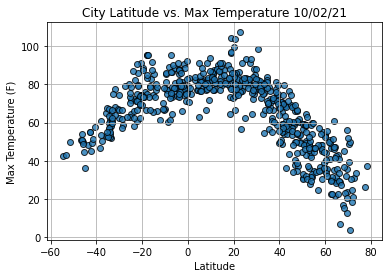

In [12]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Max Temperature " + time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig1.png")

# Show the plot
plt.show()

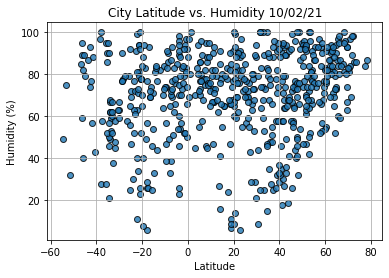

In [13]:
# Build the scatter plot for latitude vs. max temperature
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity " + time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig2.png")

# Show the plot
plt.show()

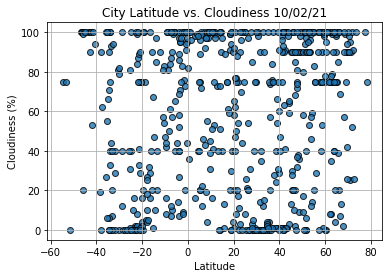

In [14]:
# Build the scatter plot for latitude vs. max temperature
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness " + time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig3.png")

# Show the plot
plt.show()

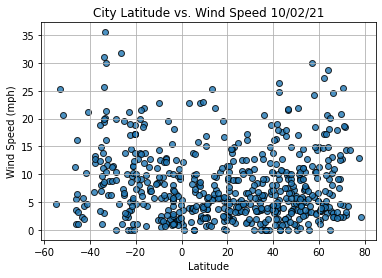

In [15]:
# Build the scatter plot for latitude vs. max temperature
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Wind Speed " + time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig4.png")

# Show the plot
plt.show()

In [16]:
# Import lineregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data and plot a regression line and the equation with the data
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values, )
    
    # Calculate the regression line "y values" from the slope and intercept
    regress_values = x_values * slope + intercept
    
    # Get the equation of the line
    line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
    
    # Create a scatter plot and plot the regression line
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r")
    
    # Annotate the text for the line equation
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel("Latitude")
    plt.ylabel(y_label)
    plt.show()

In [17]:
index13 = city_data_df.loc[13]
index13

City               Sinop Province
Country                        TR
Date          2021-10-02 15:34:36
Lat                       41.7711
Lng                       34.8709
Max Temp                    54.03
Humidity                       93
Cloudiness                     90
Wind Speed                   3.18
Name: 13, dtype: object

In [18]:
# Create Northern and Southern Hemisphere DataFrames
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

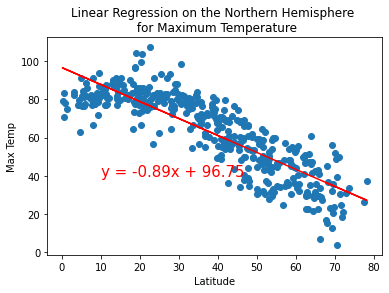

In [19]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

# Call the function
plot_linear_regression(x_values, y_values,
                       "Linear Regression on the Northern Hemisphere \n for Maximum Temperature", "Max Temp", (10,40))

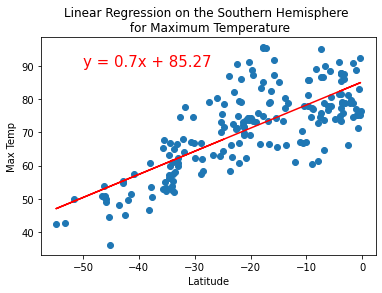

In [20]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

# Call the function
plot_linear_regression(x_values, y_values,
                       "Linear Regression on the Southern Hemisphere \n for Maximum Temperature", "Max Temp", (-50,90))

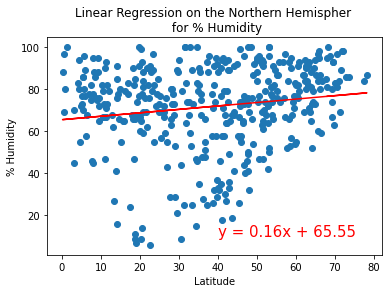

In [21]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

# Call the function
plot_linear_regression(x_values, y_values,
                       "Linear Regression on the Northern Hemispher \n for % Humidity", "% Humidity", (40,10))

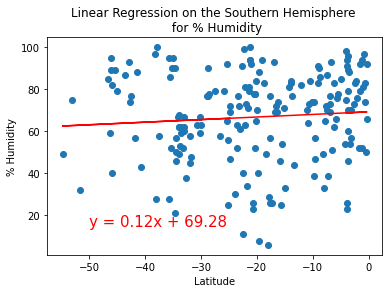

In [22]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

# Call the function
plot_linear_regression(x_values, y_values,
                       "Linear Regression on the Southern Hemisphere \n for % Humidity", "% Humidity", (-50,15))

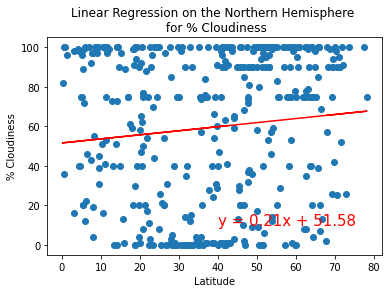

In [23]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

# Call the function 
plot_linear_regression(x_values, y_values,
                       "Linear Regression on the Northern Hemisphere \n for % Cloudiness", "% Cloudiness", (40,10))

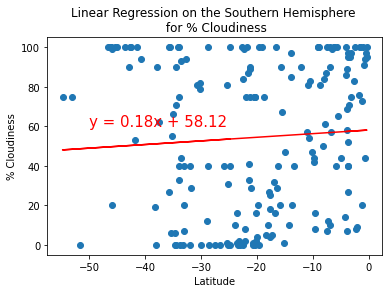

In [24]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

# Call the function
plot_linear_regression(x_values, y_values,
                       "Linear Regression on the Southern Hemisphere \n for % Cloudiness", "% Cloudiness", (-50,60))

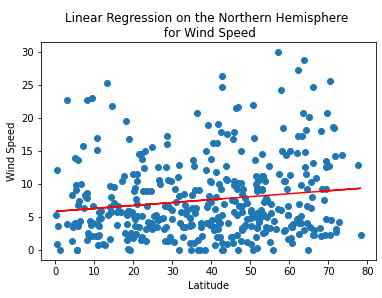

In [25]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

# Call the function
plot_linear_regression(x_values, y_values,
                      "Linear Regression on the Northern Hemisphere \n for Wind Speed", "Wind Speed", (40,35))

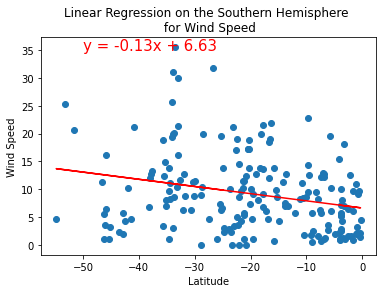

In [27]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

# Call the function
plot_linear_regression(x_values, y_values,
                      "Linear Regression on the Southern Hemisphere \n for Wind Speed", "Wind Speed", (-50,35))